# *--- Data Cleaning ---*

## Delete all the unimportant files from the directories downloaded through the Metropolitan Police Dataset

In [ ]:
# Delete all the unimportant files from the directories
# downloaded through the Metropolitan Police Dataset
import os

directory = "D:\Old_Courses\Masters Modules\Individual Project\Program\data"

# Traverse the main directory
for root, dirs, files in os.walk(directory):
    # Iterate over the files in each subdirectory
    for file in files:
        # Check if the file name contains the desired string
        if "metropolitan-stop-and-search" not in file:
            # Create the full path to the file
            file_path = os.path.join(root, file)
            # Delete the file
            os.remove(file_path)
            print(f"Deleted: {file_path}")


## Combine all the data together

In [15]:
# Combine all the data together

import os
import pandas as pd

directory = "D:\Old_Courses\Masters Modules\Individual Project\Program\data"
output_file = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Traverse the main directory
for root, dirs, files in os.walk(directory):
    # Iterate over the files in each subdirectory
    for file in files:
        # Check if the file is a CSV file
        if file.endswith(".csv"):
            # Create the full path to the file
            file_path = os.path.join(root, file)
            # Read the CSV file into a DataFrame
            data = pd.read_csv(file_path)
            # Append the data to the combined DataFrame
            combined_data = combined_data.append(data, ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv(output_file, index=False)
print(f"Combined data saved to: {output_file}")

Combined data saved to: D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv


## Print the Different "Self-defined" Ethnic Categories found in the Police dataset

In [3]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Self-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Self-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)


Different values in the 'Self-defined ethnicity' column:
White - Any other White background
Black/African/Caribbean/Black British - Caribbean
Black/African/Caribbean/Black British - African
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background
Asian/Asian British - Any other Asian background
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background
Other ethnic group - Not stated
Other ethnic group - Any other ethnic group
White - English/Welsh/Scottish/Northern Irish/British
Mixed/Multiple ethnic groups - White and Black Caribbean
Asian/Asian British - Bangladeshi
Asian/Asian British - Pakistani
nan
Asian/Asian British - Indian
Mixed/Multiple ethnic groups - White and Black African
White - Irish
Asian/Asian British - Chinese
Mixed/Multiple ethnic groups - White and Asian


## Change Self-Defined Ethnicity labels for clarity

In [4]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Define the mappings for the values in the "Self-defined ethnicity" column
mappings = {
    "White - Any other White background": "White Other",
    "Black/African/Caribbean/Black British - Caribbean": "Black",
    "Black/African/Caribbean/Black British - African": "Black",
    "Black/African/Caribbean/Black British - Any other Black/African/Caribbean background": "Black",
    "Asian/Asian British - Any other Asian background": "East Asian",
    "Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background": "Mixed",
    "Other ethnic group - Not stated": "Other",
    "Other ethnic group - Any other ethnic group": "Other",
    "White - English/Welsh/Scottish/Northern Irish/British": "White British",
    "Mixed/Multiple ethnic groups - White and Black Caribbean": "Mixed Black",
    "Asian/Asian British - Bangladeshi": "South Asian",
    "Asian/Asian British - Pakistani": "South Asian",
    "Asian/Asian British - Indian": "South Asian",
    "Mixed/Multiple ethnic groups - White and Black African": "Mixed Black",
    "White - Irish": "White British",
    "Asian/Asian British - Chinese": "East Asian",
    "Mixed/Multiple ethnic groups - White and Asian": "Mixed Asian"
}

# Map the values in the "Self-defined ethnicity" column using the defined mappings
combined_data["Self-defined ethnicity"] = combined_data["Self-defined ethnicity"].map(mappings)

# Save the updated DataFrame to a new CSV file
combined_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_new_ethnicities.csv", index=False)

print(combined_data["Self-defined ethnicity"].value_counts())


Black            293793
Other            284455
White British    225822
White Other      129083
East Asian        77522
South Asian       75389
Mixed             21596
Mixed Black       15678
Mixed Asian        2826
Name: Self-defined ethnicity, dtype: int64


# Add Borough using Ball Tree and remove NaN entries from the combined data

In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree

# Load the combined_data.csv file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_new_ethnicities.csv")

# Load the London_postcodes.csv file
london_postcodes = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\London_postcodes.csv")

# Drop rows with missing values from both DataFrames
combined_data = combined_data.dropna(subset=["Longitude", "Latitude"])
london_postcodes = london_postcodes.dropna(subset=["Longitude", "Latitude", "District"])

# Select the relevant columns for nearest neighbor search
combined_coords = combined_data[["Longitude", "Latitude"]].values
london_coords = london_postcodes[["Longitude", "Latitude"]].values
london_districts = london_postcodes["District"].values

# Perform nearest neighbor search using BallTree
tree = BallTree(london_coords, leaf_size=2)
distances, indices = tree.query(combined_coords, k=1)

# Retrieve the corresponding districts (boroughs) for each nearest neighbor
nearest_districts = london_districts[indices.ravel()]

# Assign the borough information to the combined_data DataFrame
combined_data["Borough"] = nearest_districts

# Save the updated DataFrame to a new CSV file
combined_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv", index=False)

print(combined_data.head())

C:\Users\Konstantinos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                        Type                       Date  \
0              Person search  2018-01-01T00:05:00+00:00   
1              Person search  2018-01-01T00:15:00+00:00   
2  Person and Vehicle search  2018-01-01T00:16:00+00:00   
3  Person and Vehicle search  2018-01-01T00:17:00+00:00   
4              Person search  2018-01-01T00:20:00+00:00   

   Part of a policing operation  Policing operation   Latitude  Longitude  \
0                         False                 NaN  51.425491  -0.220473   
1                         False                 NaN  51.459996  -0.116896   
2                         False                 NaN  51.542049  -0.380529   
3                         False                 NaN  51.613286  -0.065711   
4                         False                 NaN  51.461004  -0.115876   

  Gender Age range Self-defined ethnicity Officer-defined ethnicity  \
0   Male     18-24            White Other                     White   
1   Male   over 34            White Othe

## Combine only the data from 2018-2019 (Before the Covide-19 Pandemic)

In [12]:
import pandas as pd

# Read the "combined_data.csv" file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv")

# Filter the data based on the "Date" column
prepandemic_data = combined_data[combined_data["Date"].str.contains("2018|2019")]

# Save the filtered data to "prepandemic_data.csv"
prepandemic_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv", index=False)

print(prepandemic_data.head())

                        Type                       Date  \
0              Person search  2018-01-01T00:05:00+00:00   
1              Person search  2018-01-01T00:15:00+00:00   
2  Person and Vehicle search  2018-01-01T00:16:00+00:00   
3  Person and Vehicle search  2018-01-01T00:17:00+00:00   
4              Person search  2018-01-01T00:20:00+00:00   

   Part of a policing operation  Policing operation   Latitude  Longitude  \
0                         False                 NaN  51.425491  -0.220473   
1                         False                 NaN  51.459996  -0.116896   
2                         False                 NaN  51.542049  -0.380529   
3                         False                 NaN  51.613286  -0.065711   
4                         False                 NaN  51.461004  -0.115876   

  Gender Age range Self-defined ethnicity Officer-defined ethnicity  \
0   Male     18-24            White Other                     White   
1   Male   over 34            White Othe

## Combine only the data  2020-2021 (During the Covid-19 Pandemic)

In [13]:
import pandas as pd

# Read the "combined_data.csv" file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv")

# Filter the data based on the "Date" column
pandemic_data = combined_data[combined_data["Date"].str.contains("2020|2021")]

# Save the filtered data to "prepandemic_data.csv"
pandemic_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv", index=False)

print(pandemic_data.head())

                             Type                       Date  \
356983              Person search  2020-01-01T00:00:00+00:00   
356984              Person search  2020-01-01T00:01:00+00:00   
356985              Person search  2020-01-01T00:07:00+00:00   
356986  Person and Vehicle search  2020-01-01T00:10:00+00:00   
356987              Person search  2020-01-01T00:10:00+00:00   

        Part of a policing operation  Policing operation   Latitude  \
356983                         False                 NaN  51.546371   
356984                         False                 NaN  51.509232   
356985                         False                 NaN  51.588914   
356986                         False                 NaN  51.544707   
356987                         False                 NaN  51.544707   

        Longitude Gender Age range Self-defined ethnicity  \
356983  -0.076007   Male     25-34                  Mixed   
356984  -0.117576   Male     18-24                  Black   
35698

## Combine only the data from 2022-2023 (After the Covid-19 Pandemic)

In [14]:
import pandas as pd

# Read the "combined_data.csv" file
combined_data = pd.read_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv")

# Filter the data based on the "Date" column
pandemic_data = combined_data[combined_data["Date"].str.contains("2022|2023")]

# Save the filtered data to "prepandemic_data.csv"
pandemic_data.to_csv("D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv", index=False)

print(pandemic_data.head())

                             Type                       Date  \
841133  Person and Vehicle search  2022-01-01T00:00:00+00:00   
841134              Person search  2022-01-01T00:00:00+00:00   
841135  Person and Vehicle search  2022-01-01T00:00:00+00:00   
841136              Person search  2022-01-01T00:00:00+00:00   
841137              Person search  2022-01-01T00:00:00+00:00   

        Part of a policing operation  Policing operation   Latitude  \
841133                         False                 NaN  51.521306   
841134                         False                 NaN  51.374152   
841135                         False                 NaN  51.521306   
841136                         False                 NaN  51.471001   
841137                         False                 NaN  51.473023   

        Longitude  Gender Age range Self-defined ethnicity  \
841133  -0.153057    Male     18-24             East Asian   
841134  -0.105219  Female   over 34                  Other   
84

# *--- Combined Data Analysis ---*

## Count the overall sample throughout all the years

In [16]:
# Count the overall sample throughout all the years

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Total entries: {total_entries}")

Total entries: 1140779


## Count only the pre-pandemic sample throughout 2018-2019

In [17]:
# Count the pre-pandemimc sample throughout 2018-2019

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Pre-pandemic entries: {total_entries}")

Pre-pandemic entries: 356983


## Count the pandemic sample throughout 2020-2021

In [18]:
# Count the pandemimc sample throughout 2020-2021 

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Pandemic entries: {total_entries}")

Pandemic entries: 484150


## Count the post-pandemic sample throughout 2022-2023

In [19]:
# Count the post-pandemimc sample throughout 2022-2023

import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Count the total number of entries
total_entries = combined_data.shape[0]

print(f"Post-pandemic entries: {total_entries}")

Post-pandemic entries: 164480


## Count the overall number of each ethnicity in the whole sample

Total entries with 'White British' ethnicity: 225822
Total entries with 'White Other' ethnicity: 129083
Total entries with 'White (total)' ethnicity: 354905
Total entries with 'Black' ethnicity: 309471
Total entries with 'South Asian' ethnicity: 226167
Total entries with 'East Asian' ethnicity: 155044
Total entries with 'Other' ethnicity: 416364


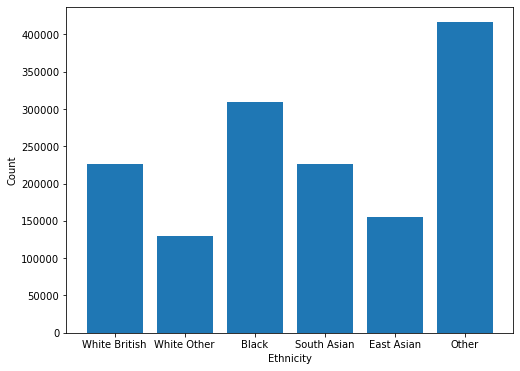

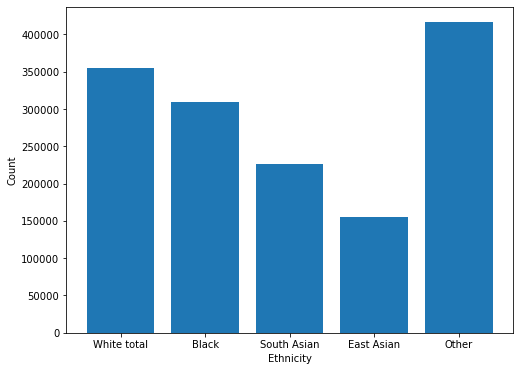

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Self-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Europeans
white_uk_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White British")]
white_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White Other")]

# Blacks
black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Black")]

# South-Asians
indian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
pakistani_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
bangladeshi_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]

# East-Asians
chinese_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]
other_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]

# Mixed and unknown
mixed_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Asian")]
other_ethnic_group = combined_data[combined_data["Self-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_british_entries = white_uk_filtered_data.shape[0]
total_white_other_entries = white_other_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_south_asian_entries = indian_filtered_data.shape[0] + pakistani_filtered_data.shape[0] + bangladeshi_filtered_data.shape[0]
total_east_asian_entries = chinese_filtered_data.shape[0] + other_asian_filtered_data.shape[0]
total_other_entries = mixed_asian_filtered_data.shape[0] + other_ethnic_group.shape[0]

# Print the total counts
print(f"Total entries with 'White British' ethnicity: {total_white_british_entries}")
print(f"Total entries with 'White Other' ethnicity: {total_white_other_entries}")
print(f"Total entries with 'White (total)' ethnicity: {total_white_british_entries + total_white_other_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'South Asian' ethnicity: {total_south_asian_entries}")
print(f"Total entries with 'East Asian' ethnicity: {total_east_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White British', 'White Other', 'Black', 'South Asian', 'East Asian', 'Other']
counts = [total_white_british_entries, total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Create a histogram with white combined
labels = ['White total', 'Black', 'South Asian', 'East Asian', 'Other']
counts = [total_white_british_entries + total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

plt.show()


## Officer-defined ethnicities

Different values in the 'Officer-defined ethnicity' column:
White
Black
Other
Asian
nan


Total entries with 'White' ethnicity: 437550
Total entries with 'Black' ethnicity: 434535
Total entries with 'Asian' ethnicity: 193434
Total entries with 'Other' ethnicity: 51204


Text(0, 0.5, 'Count')

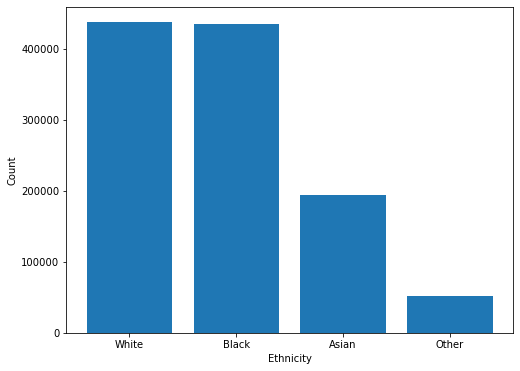

In [22]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Officer-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Officer-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)
    
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Officer-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Whites
white_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("White")]
# Blacks
black_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Black")]
# Asians
asian_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Asian")]
# Others
other_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_entries = white_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_asian_entries = asian_filtered_data.shape[0]
total_other_entries = other_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'White' ethnicity: {total_white_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'Asian' ethnicity: {total_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White', 'Black', 'Asian', 'Other']
counts = [total_white_entries, total_black_entries, total_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

## Gender Details

In [27]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Gender" column
gender_values = combined_data["Gender"].unique()

# Print the different values
print("Different values in the 'Gender' column:")
for value in gender_values:
    print(value)

Different values in the 'Gender' column:
Male
Female
nan
Other




Total entries with 'Male' gender: 1043265
Total entries with 'Female' gender: 81938
Total entries with 'Other' gender: 783


Text(0, 0.5, 'Count')

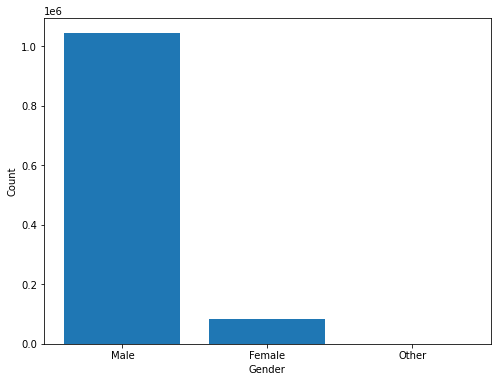

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Gender" column with a default value
combined_data["Gender"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Male
male_filtered_data = combined_data[combined_data["Gender"].str.contains("Male")]
# Female
female_filtered_data = combined_data[combined_data["Gender"].str.contains("Female")]
# Other
other_gender_filtered_data = combined_data[combined_data["Gender"].str.contains("Other")]

# Count the number of entries
total_male_entries = male_filtered_data.shape[0]
total_female_entries = female_filtered_data.shape[0]
total_other_gender_entries = other_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'Male' gender: {total_male_entries}")
print(f"Total entries with 'Female' gender: {total_female_entries}")
print(f"Total entries with 'Other' gender: {total_other_gender_entries}")

# Create a histogram
labels = ['Male', 'Female', 'Other']
counts = [total_male_entries, total_female_entries, total_other_gender_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel('Count')

## Age Details

In [31]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Age" column
gender_values = combined_data["Age range"].unique()

# Print the different values
print("Different values in the 'Age range' column:")
for value in gender_values:
    print(value)

Different values in the 'Age range' column:
18-24
over 34
25-34
nan
10-17
under 10




Total entries in the '<10' age range: 256
Total entries in the '10-17' age range: 184025
Total entries in the '18-24' age range: 373135
Total entries in the '25-34' age range: 241893
Total entries in the '>34' age range: 189354


Text(0, 0.5, 'Count')

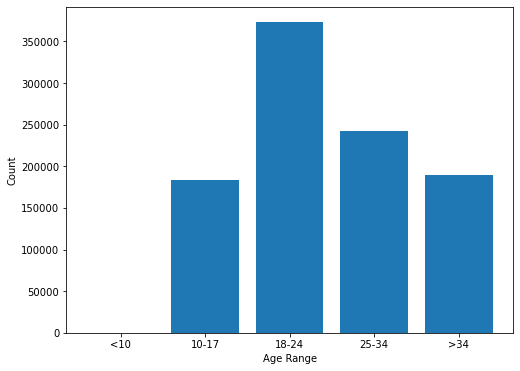

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Filter the DataFrame based on the "Age range" column

# Under 10
under_ten_filtered_data = combined_data[combined_data["Age range"].str.contains("under 10")]
# 10-17
ten_seventeen_filtered_data = combined_data[combined_data["Age range"].str.contains("10-17")]
# 18-24
eighteen_twentyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("18-24")]
# 25-34
twentyfive_thirtyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("25-34")]
# over 34
over_thirtyfour_gender_filtered_data = combined_data[combined_data["Age range"].str.contains("over 34")]

# Count the number of entries
total_u10_entries = under_ten_filtered_data.shape[0]
total_10_17_entries = ten_seventeen_filtered_data.shape[0]
total_18_24_entries = eighteen_twentyfour_filtered_data.shape[0]
total_25_34_entries = twentyfive_thirtyfour_filtered_data.shape[0]
total_o34_entries = over_thirtyfour_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries in the '<10' age range: {total_u10_entries}")
print(f"Total entries in the '10-17' age range: {total_10_17_entries}")
print(f"Total entries in the '18-24' age range: {total_18_24_entries}")
print(f"Total entries in the '25-34' age range: {total_25_34_entries}")
print(f"Total entries in the '>34' age range: {total_o34_entries}")

# Create a histogram
labels = ['<10', '10-17', '18-24', '25-34', '>34']
counts = [total_u10_entries, total_10_17_entries, total_18_24_entries, total_25_34_entries, total_o34_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Age Range')
plt.ylabel('Count')

    Self-defined ethnicity Age range Gender   Count
7                    Black     18-24   Male  102039
84                   Other     18-24   Male   78838
78                   Other             Male   60834
4                    Black     10-17   Male   55956
118          White British     18-24   Male   55601


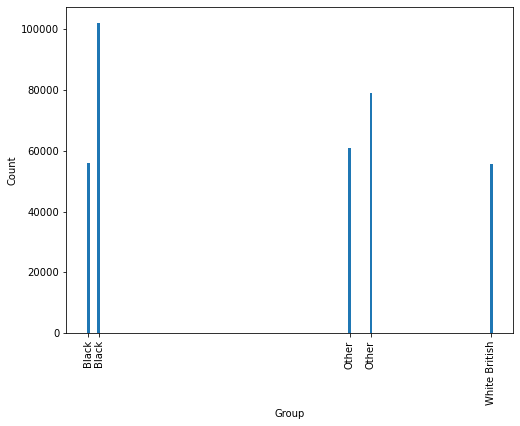

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\combined_data_clean.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Group the DataFrame based on "Self-defined ethnicity", "Age range", and "Gender"
grouped_data = combined_data.groupby(["Self-defined ethnicity", "Age range", "Gender"]).size().reset_index(name="Count")

# Sort the grouped data by count in descending order
sorted_data = grouped_data.sort_values(by="Count", ascending=False)

# Take only the top 5 largest values
top_5_data = sorted_data.head(5)

# Print the total counts for each group
print(top_5_data)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(top_5_data.index, top_5_data["Count"])
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(top_5_data.index, top_5_data["Self-defined ethnicity"], rotation=90)
plt.show()


## *--- Pre-pandemic Data Analysis ---*

## Count the overall number of each ethnicity in the pre-pandemic sample

Total entries with 'White British' ethnicity: 68071
Total entries with 'White Other' ethnicity: 41168
Total entries with 'White (total)' ethnicity: 109239
Total entries with 'Black' ethnicity: 110778
Total entries with 'South Asian' ethnicity: 83136
Total entries with 'East Asian' ethnicity: 47570
Total entries with 'Other' ethnicity: 115495


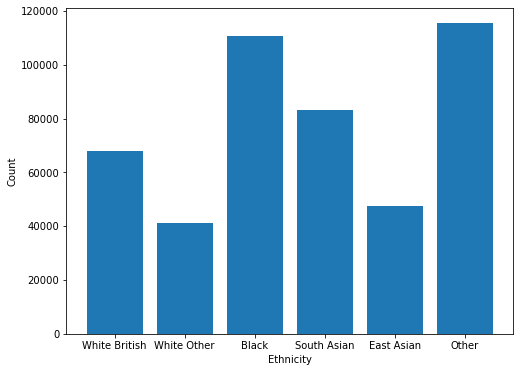

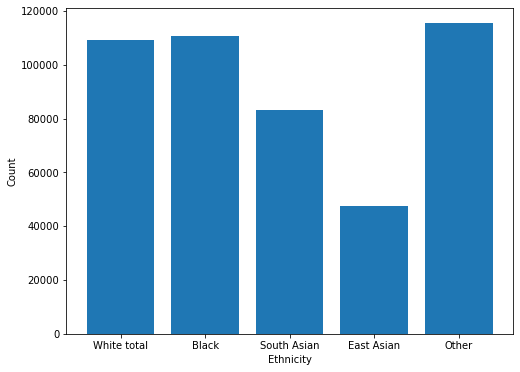

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Self-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Europeans
white_uk_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White British")]
white_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White Other")]

# Blacks
black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Black")]

# South-Asians
indian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
pakistani_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
bangladeshi_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]

# East-Asians
chinese_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]
other_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]

# Mixed and unknown
mixed_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Asian")]
other_ethnic_group = combined_data[combined_data["Self-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_british_entries = white_uk_filtered_data.shape[0]
total_white_other_entries = white_other_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_south_asian_entries = indian_filtered_data.shape[0] + pakistani_filtered_data.shape[0] + bangladeshi_filtered_data.shape[0]
total_east_asian_entries = chinese_filtered_data.shape[0] + other_asian_filtered_data.shape[0]
total_other_entries = mixed_asian_filtered_data.shape[0] + other_ethnic_group.shape[0]

# Print the total counts
print(f"Total entries with 'White British' ethnicity: {total_white_british_entries}")
print(f"Total entries with 'White Other' ethnicity: {total_white_other_entries}")
print(f"Total entries with 'White (total)' ethnicity: {total_white_british_entries + total_white_other_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'South Asian' ethnicity: {total_south_asian_entries}")
print(f"Total entries with 'East Asian' ethnicity: {total_east_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White British', 'White Other', 'Black', 'South Asian', 'East Asian', 'Other']
counts = [total_white_british_entries, total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Create a histogram with white combined
labels = ['White total', 'Black', 'South Asian', 'East Asian', 'Other']
counts = [total_white_british_entries + total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

plt.show()


## Officer-defined ethnicities

Different values in the 'Officer-defined ethnicity' column:
White
Black
Other
Asian
nan


Total entries with 'White' ethnicity: 437550
Total entries with 'Black' ethnicity: 434535
Total entries with 'Asian' ethnicity: 193434
Total entries with 'Other' ethnicity: 51204


Text(0, 0.5, 'Count')

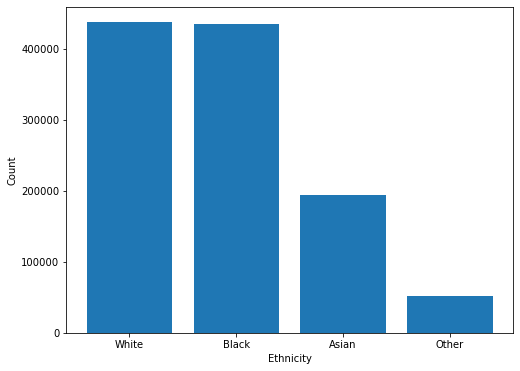

In [16]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Officer-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Officer-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)
    
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Officer-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Whites
white_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("White")]
# Blacks
black_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Black")]
# Asians
asian_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Asian")]
# Others
other_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_entries = white_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_asian_entries = asian_filtered_data.shape[0]
total_other_entries = other_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'White' ethnicity: {total_white_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'Asian' ethnicity: {total_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White', 'Black', 'Asian', 'Other']
counts = [total_white_entries, total_black_entries, total_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

## Gender Details

In [27]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Gender" column
gender_values = combined_data["Gender"].unique()

# Print the different values
print("Different values in the 'Gender' column:")
for value in gender_values:
    print(value)

Different values in the 'Gender' column:
Male
Female
nan
Other




Total entries with 'Male' gender: 1043265
Total entries with 'Female' gender: 81938
Total entries with 'Other' gender: 783


Text(0, 0.5, 'Count')

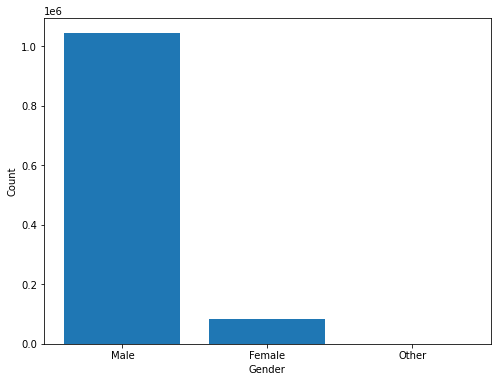

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Gender" column with a default value
combined_data["Gender"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Male
male_filtered_data = combined_data[combined_data["Gender"].str.contains("Male")]
# Female
female_filtered_data = combined_data[combined_data["Gender"].str.contains("Female")]
# Other
other_gender_filtered_data = combined_data[combined_data["Gender"].str.contains("Other")]

# Count the number of entries
total_male_entries = male_filtered_data.shape[0]
total_female_entries = female_filtered_data.shape[0]
total_other_gender_entries = other_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'Male' gender: {total_male_entries}")
print(f"Total entries with 'Female' gender: {total_female_entries}")
print(f"Total entries with 'Other' gender: {total_other_gender_entries}")

# Create a histogram
labels = ['Male', 'Female', 'Other']
counts = [total_male_entries, total_female_entries, total_other_gender_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel('Count')

## Age Details

In [31]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Age" column
gender_values = combined_data["Age range"].unique()

# Print the different values
print("Different values in the 'Age range' column:")
for value in gender_values:
    print(value)

Different values in the 'Age range' column:
18-24
over 34
25-34
nan
10-17
under 10




Total entries in the '<10' age range: 256
Total entries in the '10-17' age range: 184025
Total entries in the '18-24' age range: 373135
Total entries in the '25-34' age range: 241893
Total entries in the '>34' age range: 189354


Text(0, 0.5, 'Count')

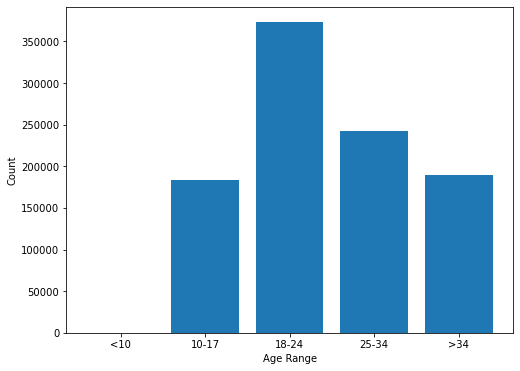

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Filter the DataFrame based on the "Age range" column

# Under 10
under_ten_filtered_data = combined_data[combined_data["Age range"].str.contains("under 10")]
# 10-17
ten_seventeen_filtered_data = combined_data[combined_data["Age range"].str.contains("10-17")]
# 18-24
eighteen_twentyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("18-24")]
# 25-34
twentyfive_thirtyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("25-34")]
# over 34
over_thirtyfour_gender_filtered_data = combined_data[combined_data["Age range"].str.contains("over 34")]

# Count the number of entries
total_u10_entries = under_ten_filtered_data.shape[0]
total_10_17_entries = ten_seventeen_filtered_data.shape[0]
total_18_24_entries = eighteen_twentyfour_filtered_data.shape[0]
total_25_34_entries = twentyfive_thirtyfour_filtered_data.shape[0]
total_o34_entries = over_thirtyfour_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries in the '<10' age range: {total_u10_entries}")
print(f"Total entries in the '10-17' age range: {total_10_17_entries}")
print(f"Total entries in the '18-24' age range: {total_18_24_entries}")
print(f"Total entries in the '25-34' age range: {total_25_34_entries}")
print(f"Total entries in the '>34' age range: {total_o34_entries}")

# Create a histogram
labels = ['<10', '10-17', '18-24', '25-34', '>34']
counts = [total_u10_entries, total_10_17_entries, total_18_24_entries, total_25_34_entries, total_o34_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Age Range')
plt.ylabel('Count')

    Self-defined ethnicity Age range Gender   Count
7                    Black     18-24   Male  102039
84                   Other     18-24   Male   78838
78                   Other             Male   60834
4                    Black     10-17   Male   55956
118          White British     18-24   Male   55601


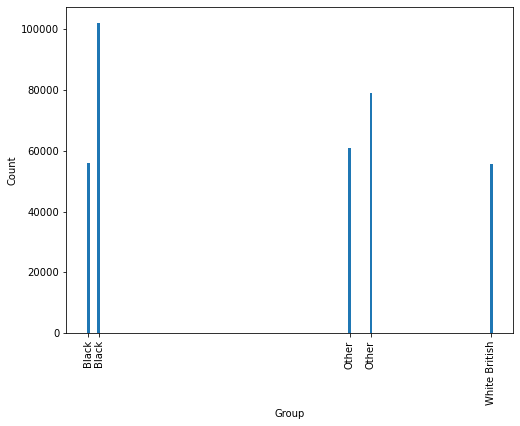

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data_clean.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Group the DataFrame based on "Self-defined ethnicity", "Age range", and "Gender"
grouped_data = combined_data.groupby(["Self-defined ethnicity", "Age range", "Gender"]).size().reset_index(name="Count")

# Sort the grouped data by count in descending order
sorted_data = grouped_data.sort_values(by="Count", ascending=False)

# Take only the top 5 largest values
top_5_data = sorted_data.head(5)

# Print the total counts for each group
print(top_5_data)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(top_5_data.index, top_5_data["Count"])
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(top_5_data.index, top_5_data["Self-defined ethnicity"], rotation=90)
plt.show()


## *--- Pandemic Data Analysis ---*

## Count the overall number of each ethnicity in the pandemic sample

Total entries with 'White British' ethnicity: 96238
Total entries with 'White Other' ethnicity: 55148
Total entries with 'White (total)' ethnicity: 151386
Total entries with 'Black' ethnicity: 123178
Total entries with 'South Asian' ethnicity: 91587
Total entries with 'East Asian' ethnicity: 68796
Total entries with 'Other' ethnicity: 183900


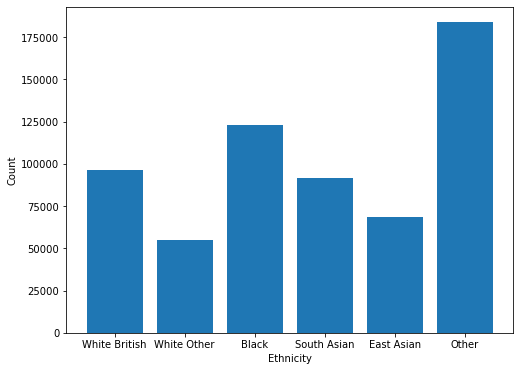

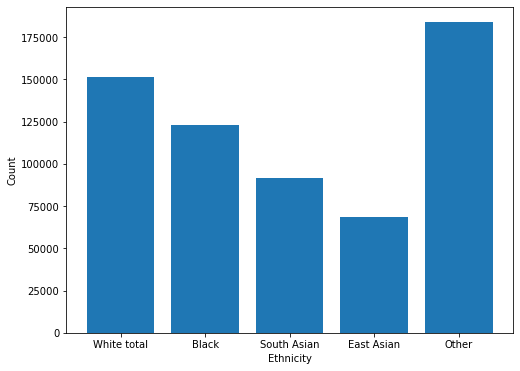

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Self-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Europeans
white_uk_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White British")]
white_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White Other")]

# Blacks
black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Black")]

# South-Asians
indian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
pakistani_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
bangladeshi_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]

# East-Asians
chinese_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]
other_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]

# Mixed and unknown
mixed_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Asian")]
other_ethnic_group = combined_data[combined_data["Self-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_british_entries = white_uk_filtered_data.shape[0]
total_white_other_entries = white_other_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_south_asian_entries = indian_filtered_data.shape[0] + pakistani_filtered_data.shape[0] + bangladeshi_filtered_data.shape[0]
total_east_asian_entries = chinese_filtered_data.shape[0] + other_asian_filtered_data.shape[0]
total_other_entries = mixed_asian_filtered_data.shape[0] + other_ethnic_group.shape[0]

# Print the total counts
print(f"Total entries with 'White British' ethnicity: {total_white_british_entries}")
print(f"Total entries with 'White Other' ethnicity: {total_white_other_entries}")
print(f"Total entries with 'White (total)' ethnicity: {total_white_british_entries + total_white_other_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'South Asian' ethnicity: {total_south_asian_entries}")
print(f"Total entries with 'East Asian' ethnicity: {total_east_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White British', 'White Other', 'Black', 'South Asian', 'East Asian', 'Other']
counts = [total_white_british_entries, total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Create a histogram with white combined
labels = ['White total', 'Black', 'South Asian', 'East Asian', 'Other']
counts = [total_white_british_entries + total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

plt.show()


## Officer-defined ethnicities

Different values in the 'Officer-defined ethnicity' column:
Black
Asian
Other
White
nan


Total entries with 'White' ethnicity: 129599
Total entries with 'Black' ethnicity: 145557
Total entries with 'Asian' ethnicity: 61309
Total entries with 'Other' ethnicity: 13639


Text(0, 0.5, 'Count')

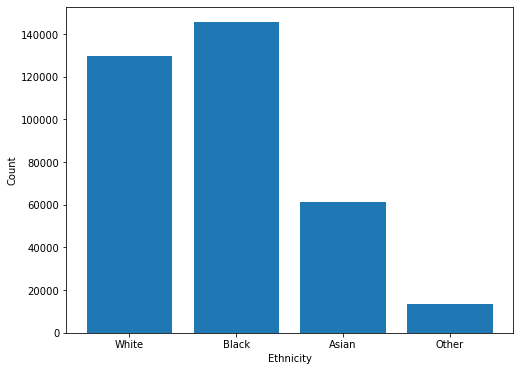

In [2]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Officer-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Officer-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)
    
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Officer-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Whites
white_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("White")]
# Blacks
black_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Black")]
# Asians
asian_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Asian")]
# Others
other_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_entries = white_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_asian_entries = asian_filtered_data.shape[0]
total_other_entries = other_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'White' ethnicity: {total_white_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'Asian' ethnicity: {total_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White', 'Black', 'Asian', 'Other']
counts = [total_white_entries, total_black_entries, total_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

## Gender Details

In [3]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Gender" column
gender_values = combined_data["Gender"].unique()

# Print the different values
print("Different values in the 'Gender' column:")
for value in gender_values:
    print(value)

Different values in the 'Gender' column:
Male
Female
nan
Other




Total entries with 'Male' gender: 442019
Total entries with 'Female' gender: 34951
Total entries with 'Other' gender: 361


Text(0, 0.5, 'Count')

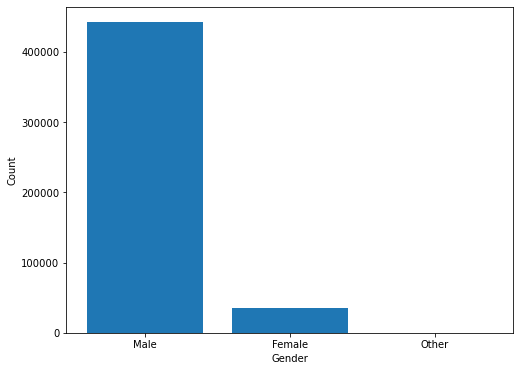

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Gender" column with a default value
combined_data["Gender"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Male
male_filtered_data = combined_data[combined_data["Gender"].str.contains("Male")]
# Female
female_filtered_data = combined_data[combined_data["Gender"].str.contains("Female")]
# Other
other_gender_filtered_data = combined_data[combined_data["Gender"].str.contains("Other")]

# Count the number of entries
total_male_entries = male_filtered_data.shape[0]
total_female_entries = female_filtered_data.shape[0]
total_other_gender_entries = other_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'Male' gender: {total_male_entries}")
print(f"Total entries with 'Female' gender: {total_female_entries}")
print(f"Total entries with 'Other' gender: {total_other_gender_entries}")

# Create a histogram
labels = ['Male', 'Female', 'Other']
counts = [total_male_entries, total_female_entries, total_other_gender_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel('Count')

## Age Details

In [5]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Age" column
gender_values = combined_data["Age range"].unique()

# Print the different values
print("Different values in the 'Age range' column:")
for value in gender_values:
    print(value)

Different values in the 'Age range' column:
25-34
18-24
nan
10-17
over 34
under 10




Total entries in the '<10' age range: 116
Total entries in the '10-17' age range: 72758
Total entries in the '18-24' age range: 162015
Total entries in the '25-34' age range: 108082
Total entries in the '>34' age range: 82508


Text(0, 0.5, 'Count')

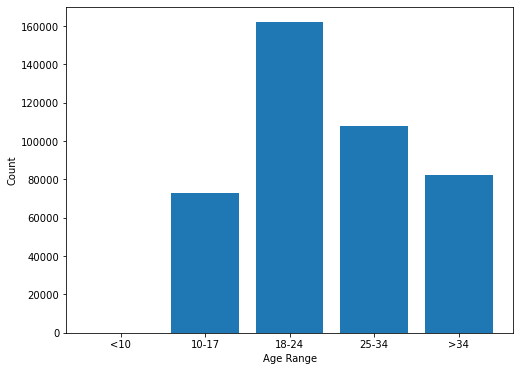

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Filter the DataFrame based on the "Age range" column

# Under 10
under_ten_filtered_data = combined_data[combined_data["Age range"].str.contains("under 10")]
# 10-17
ten_seventeen_filtered_data = combined_data[combined_data["Age range"].str.contains("10-17")]
# 18-24
eighteen_twentyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("18-24")]
# 25-34
twentyfive_thirtyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("25-34")]
# over 34
over_thirtyfour_gender_filtered_data = combined_data[combined_data["Age range"].str.contains("over 34")]

# Count the number of entries
total_u10_entries = under_ten_filtered_data.shape[0]
total_10_17_entries = ten_seventeen_filtered_data.shape[0]
total_18_24_entries = eighteen_twentyfour_filtered_data.shape[0]
total_25_34_entries = twentyfive_thirtyfour_filtered_data.shape[0]
total_o34_entries = over_thirtyfour_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries in the '<10' age range: {total_u10_entries}")
print(f"Total entries in the '10-17' age range: {total_10_17_entries}")
print(f"Total entries in the '18-24' age range: {total_18_24_entries}")
print(f"Total entries in the '25-34' age range: {total_25_34_entries}")
print(f"Total entries in the '>34' age range: {total_o34_entries}")

# Create a histogram
labels = ['<10', '10-17', '18-24', '25-34', '>34']
counts = [total_u10_entries, total_10_17_entries, total_18_24_entries, total_25_34_entries, total_o34_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Age Range')
plt.ylabel('Count')

    Self-defined ethnicity Age range Gender  Count
7                    Black     18-24   Male  41635
77                   Other     18-24   Male  36363
71                   Other             Male  25838
108          White British     18-24   Male  24634
80                   Other     25-34   Male  23723


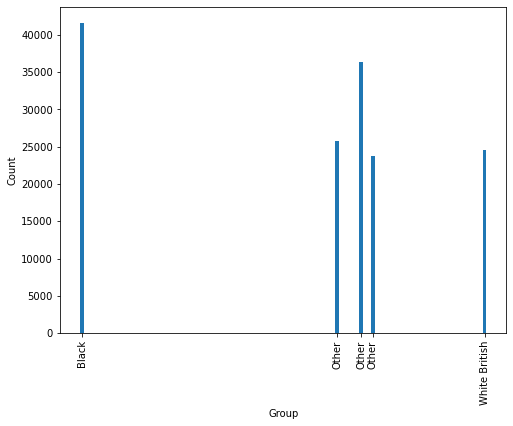

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Group the DataFrame based on "Self-defined ethnicity", "Age range", and "Gender"
grouped_data = combined_data.groupby(["Self-defined ethnicity", "Age range", "Gender"]).size().reset_index(name="Count")

# Sort the grouped data by count in descending order
sorted_data = grouped_data.sort_values(by="Count", ascending=False)

# Take only the top 5 largest values
top_5_data = sorted_data.head(5)

# Print the total counts for each group
print(top_5_data)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(top_5_data.index, top_5_data["Count"])
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(top_5_data.index, top_5_data["Self-defined ethnicity"], rotation=90)
plt.show()


## *--- Post-pandemic Data Analysis ---*

## Count the overall number of each ethnicity in the post-pandemic sample

Total entries with 'White British' ethnicity: 32143
Total entries with 'White Other' ethnicity: 17867
Total entries with 'White (total)' ethnicity: 50010
Total entries with 'Black' ethnicity: 38535
Total entries with 'South Asian' ethnicity: 25980
Total entries with 'East Asian' ethnicity: 20180
Total entries with 'Other' ethnicity: 69922


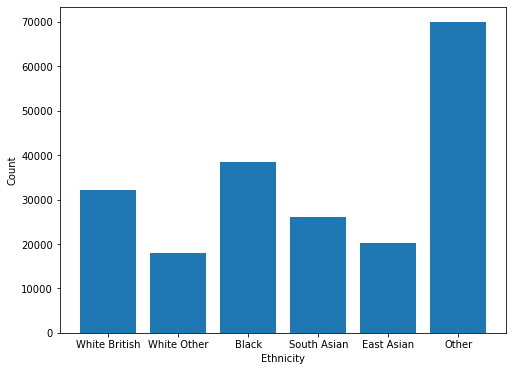

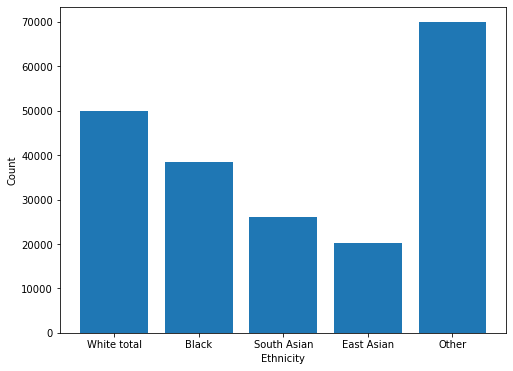

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Self-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Europeans
white_uk_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White British")]
white_other_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("White Other")]

# Blacks
black_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Black")]

# South-Asians
indian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
pakistani_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]
bangladeshi_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("South Asian")]

# East-Asians
chinese_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]
other_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("East Asian")]

# Mixed and unknown
mixed_asian_filtered_data = combined_data[combined_data["Self-defined ethnicity"].str.contains("Mixed Asian")]
other_ethnic_group = combined_data[combined_data["Self-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_british_entries = white_uk_filtered_data.shape[0]
total_white_other_entries = white_other_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_south_asian_entries = indian_filtered_data.shape[0] + pakistani_filtered_data.shape[0] + bangladeshi_filtered_data.shape[0]
total_east_asian_entries = chinese_filtered_data.shape[0] + other_asian_filtered_data.shape[0]
total_other_entries = mixed_asian_filtered_data.shape[0] + other_ethnic_group.shape[0]

# Print the total counts
print(f"Total entries with 'White British' ethnicity: {total_white_british_entries}")
print(f"Total entries with 'White Other' ethnicity: {total_white_other_entries}")
print(f"Total entries with 'White (total)' ethnicity: {total_white_british_entries + total_white_other_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'South Asian' ethnicity: {total_south_asian_entries}")
print(f"Total entries with 'East Asian' ethnicity: {total_east_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White British', 'White Other', 'Black', 'South Asian', 'East Asian', 'Other']
counts = [total_white_british_entries, total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Create a histogram with white combined
labels = ['White total', 'Black', 'South Asian', 'East Asian', 'Other']
counts = [total_white_british_entries + total_white_other_entries, total_black_entries, total_south_asian_entries, total_east_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

plt.show()


## Officer-defined ethnicities

Different values in the 'Officer-defined ethnicity' column:
Asian
White
Black
Other
nan


Total entries with 'White' ethnicity: 129599
Total entries with 'Black' ethnicity: 145557
Total entries with 'Asian' ethnicity: 61309
Total entries with 'Other' ethnicity: 13639


Text(0, 0.5, 'Count')

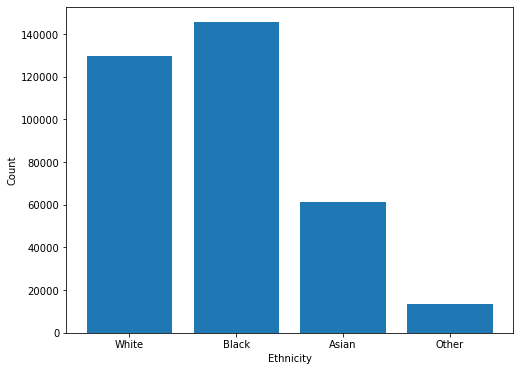

In [10]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Self-defined ethnicity" column
ethnicity_values = combined_data["Officer-defined ethnicity"].unique()

# Print the different values
print("Different values in the 'Officer-defined ethnicity' column:")
for value in ethnicity_values:
    print(value)
    
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\prepandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Self-defined ethnicity" column with a default value
combined_data["Officer-defined ethnicity"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Whites
white_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("White")]
# Blacks
black_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Black")]
# Asians
asian_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Asian")]
# Others
other_filtered_data = combined_data[combined_data["Officer-defined ethnicity"].str.contains("Other")]

# Count the number of entries
total_white_entries = white_filtered_data.shape[0]
total_black_entries = black_filtered_data.shape[0]
total_asian_entries = asian_filtered_data.shape[0]
total_other_entries = other_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'White' ethnicity: {total_white_entries}")
print(f"Total entries with 'Black' ethnicity: {total_black_entries}")
print(f"Total entries with 'Asian' ethnicity: {total_asian_entries}")
print(f"Total entries with 'Other' ethnicity: {total_other_entries}")

# Create a histogram
labels = ['White', 'Black', 'Asian', 'Other']
counts = [total_white_entries, total_black_entries, total_asian_entries, total_other_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')

## Gender Details

In [11]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Gender" column
gender_values = combined_data["Gender"].unique()

# Print the different values
print("Different values in the 'Gender' column:")
for value in gender_values:
    print(value)

Different values in the 'Gender' column:
Male
Female
nan
Other




Total entries with 'Male' gender: 149256
Total entries with 'Female' gender: 13225
Total entries with 'Other' gender: 128


Text(0, 0.5, 'Count')

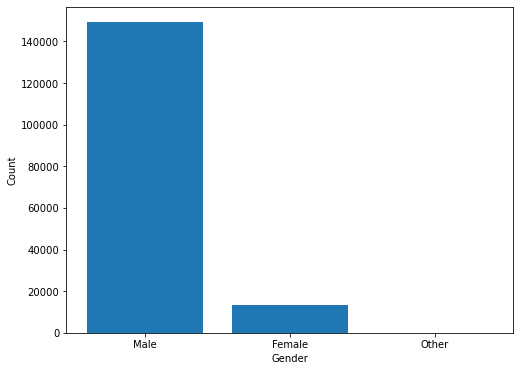

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Gender" column with a default value
combined_data["Gender"].fillna("", inplace=True)

# Filter the DataFrame based on the "Self-defined ethnicity" column

# Male
male_filtered_data = combined_data[combined_data["Gender"].str.contains("Male")]
# Female
female_filtered_data = combined_data[combined_data["Gender"].str.contains("Female")]
# Other
other_gender_filtered_data = combined_data[combined_data["Gender"].str.contains("Other")]

# Count the number of entries
total_male_entries = male_filtered_data.shape[0]
total_female_entries = female_filtered_data.shape[0]
total_other_gender_entries = other_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries with 'Male' gender: {total_male_entries}")
print(f"Total entries with 'Female' gender: {total_female_entries}")
print(f"Total entries with 'Other' gender: {total_other_gender_entries}")

# Create a histogram
labels = ['Male', 'Female', 'Other']
counts = [total_male_entries, total_female_entries, total_other_gender_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Gender')
plt.ylabel('Count')

## Age Details

In [13]:
import pandas as pd

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Retrieve the unique values in the "Age" column
gender_values = combined_data["Age range"].unique()

# Print the different values
print("Different values in the 'Age range' column:")
for value in gender_values:
    print(value)

Different values in the 'Age range' column:
18-24
over 34
25-34
nan
10-17
under 10




Total entries in the '<10' age range: 44
Total entries in the '10-17' age range: 25618
Total entries in the '18-24' age range: 47350
Total entries in the '25-34' age range: 34741
Total entries in the '>34' age range: 33799


Text(0, 0.5, 'Count')

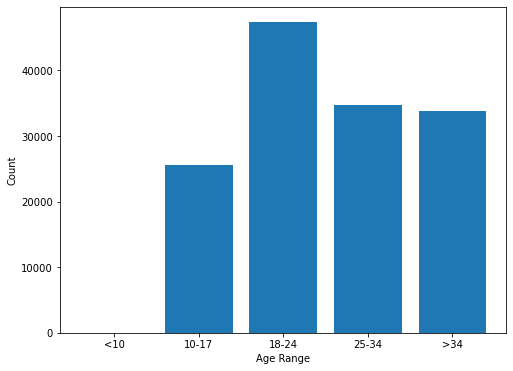

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\postpandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Filter the DataFrame based on the "Age range" column

# Under 10
under_ten_filtered_data = combined_data[combined_data["Age range"].str.contains("under 10")]
# 10-17
ten_seventeen_filtered_data = combined_data[combined_data["Age range"].str.contains("10-17")]
# 18-24
eighteen_twentyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("18-24")]
# 25-34
twentyfive_thirtyfour_filtered_data = combined_data[combined_data["Age range"].str.contains("25-34")]
# over 34
over_thirtyfour_gender_filtered_data = combined_data[combined_data["Age range"].str.contains("over 34")]

# Count the number of entries
total_u10_entries = under_ten_filtered_data.shape[0]
total_10_17_entries = ten_seventeen_filtered_data.shape[0]
total_18_24_entries = eighteen_twentyfour_filtered_data.shape[0]
total_25_34_entries = twentyfive_thirtyfour_filtered_data.shape[0]
total_o34_entries = over_thirtyfour_gender_filtered_data.shape[0]

# Print the total counts
print("\n")
print(f"Total entries in the '<10' age range: {total_u10_entries}")
print(f"Total entries in the '10-17' age range: {total_10_17_entries}")
print(f"Total entries in the '18-24' age range: {total_18_24_entries}")
print(f"Total entries in the '25-34' age range: {total_25_34_entries}")
print(f"Total entries in the '>34' age range: {total_o34_entries}")

# Create a histogram
labels = ['<10', '10-17', '18-24', '25-34', '>34']
counts = [total_u10_entries, total_10_17_entries, total_18_24_entries, total_25_34_entries, total_o34_entries]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(labels, counts)
plt.xlabel('Age Range')
plt.ylabel('Count')

    Self-defined ethnicity Age range Gender  Count
7                    Black     18-24   Male  41635
77                   Other     18-24   Male  36363
71                   Other             Male  25838
108          White British     18-24   Male  24634
80                   Other     25-34   Male  23723


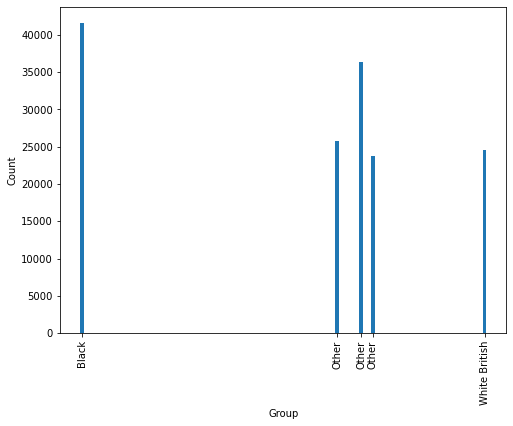

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "D:\Old_Courses\Masters Modules\Individual Project\Program\pandemic_combined_data.csv"

# Read the CSV file into a DataFrame
combined_data = pd.read_csv(file_path)

# Fill missing values in the "Age range" column with a default value
combined_data["Age range"].fillna("", inplace=True)

# Group the DataFrame based on "Self-defined ethnicity", "Age range", and "Gender"
grouped_data = combined_data.groupby(["Self-defined ethnicity", "Age range", "Gender"]).size().reset_index(name="Count")

# Sort the grouped data by count in descending order
sorted_data = grouped_data.sort_values(by="Count", ascending=False)

# Take only the top 5 largest values
top_5_data = sorted_data.head(5)

# Print the total counts for each group
print(top_5_data)

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.bar(top_5_data.index, top_5_data["Count"])
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(top_5_data.index, top_5_data["Self-defined ethnicity"], rotation=90)
plt.show()
